In [32]:
import json, base64, io, numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [33]:
def clip_prefix(s):
  q = s.index("base64")
  return s[q + 6:]

In [34]:
with open("scraped_data.json", "r") as f:
  obj = json.load(f)
  imgs = []
  for path in obj:
    path = clip_prefix(path)
    b64 = base64.b64decode(path)
    image = Image.open(io.BytesIO(b64))
    image_np = np.array(image)
    imgs.append(image_np)

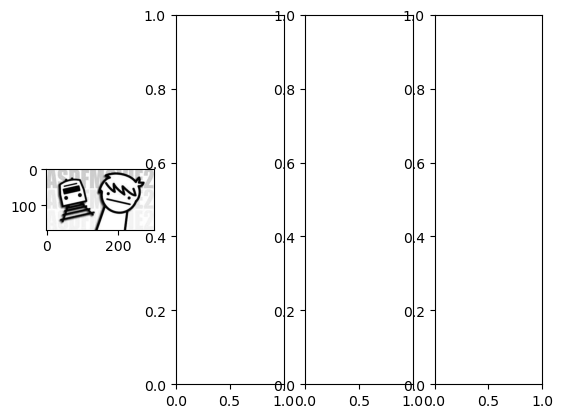

In [35]:
c = 4
rows = (len(imgs) + c - 1) // c
f, axarr = plt.subplots((len(imgs) + c - 1) // c, c)
if rows == 1:
  axarr = [axarr]
for i, v in enumerate(imgs):
  if len(v.shape) == 2:
    v = np.tile(v[:,:,None], (1, 1, 3))
  axarr[i // c][i % c].imshow(v)